# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file    = "data/train.p"
validation_file  = "data/valid.p"
testing_file     = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of testing examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

DISCUSSION: Basic summary of the data set and the exploratory data analysis.

I used the pandas library to read all the labels from the signnames.csv file. I then plotted the bar plots to see how many sample I have for each class. Following are the bumber of examples in each set:
Number of training examples = 34799
Number of testing examples = 12630
Number of testing examples = 4410
There are total 43 traffic sign classes.

Text(0.5,1,'Number of Each Sign in Training set')

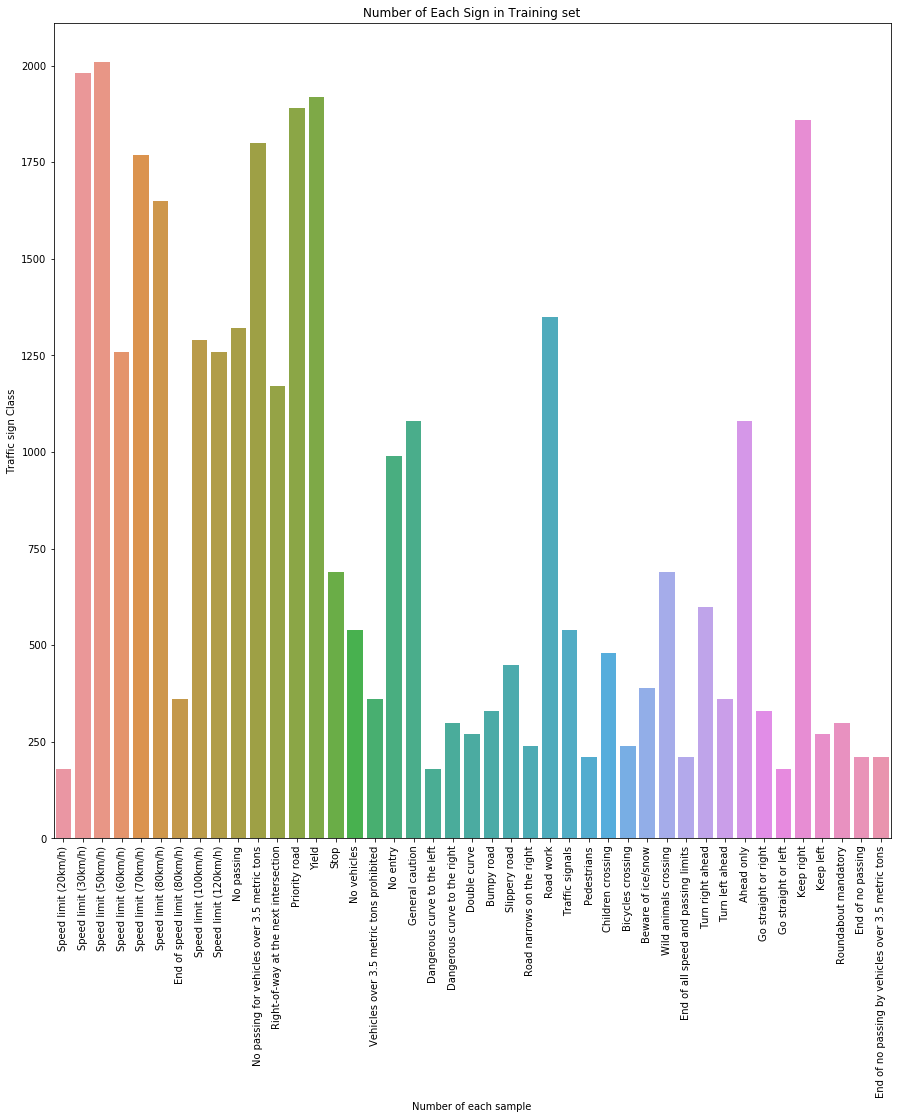

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

labels = []
df = pd.read_csv("signnames.csv")
for label in df['SignName']:
    labels.append(label)

    
d = np.unique(y_train,return_counts = True)
class_label_num = d[0]
class_label_count = d[1]
plt.figure(figsize = (15,15))
ax = sns.barplot(class_label_num,class_label_count, orient = 'o');
plt.xticks(rotation = 90)
plt.xticks(class_label_num,labels);
plt.ylabel("Traffic sign Class")
plt.xlabel("Number of each sample")
plt.title("Number of Each Sign in Training set")


Text(0.5,1,'Number of Each Sign in Test set')

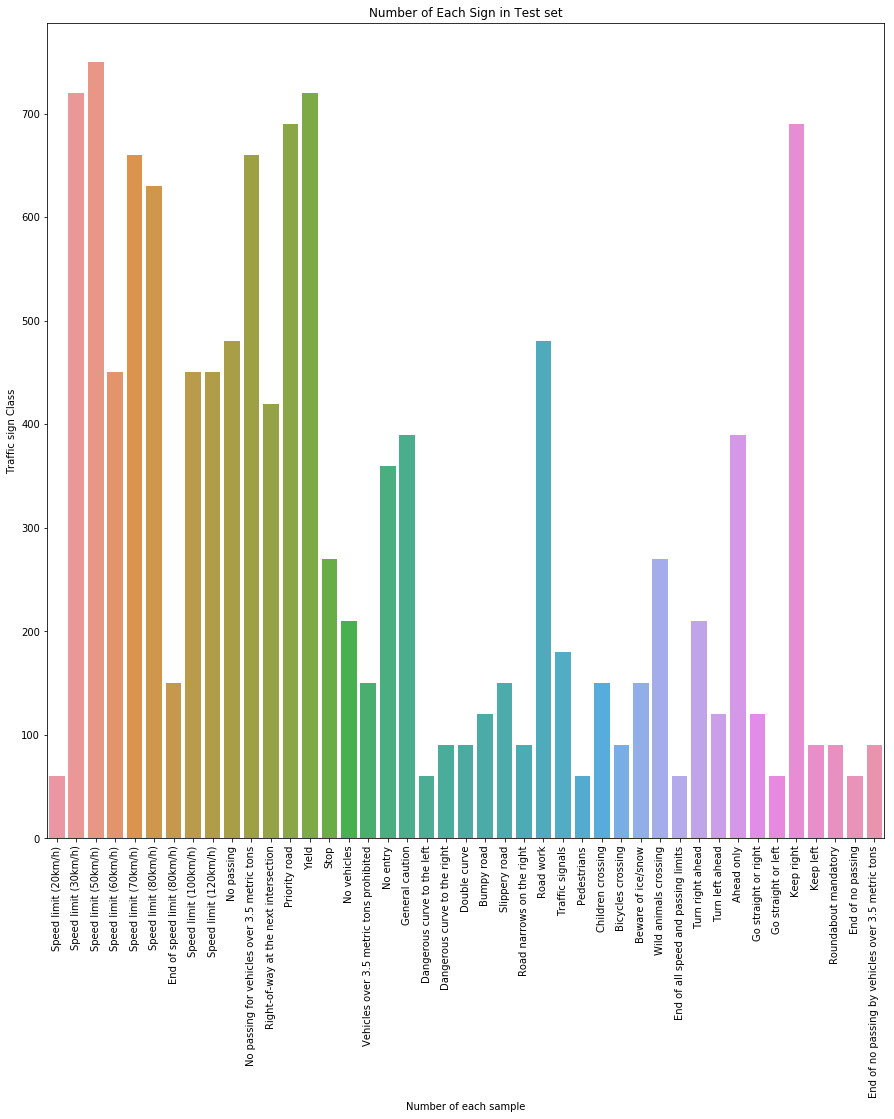

In [5]:
d = np.unique(y_test,return_counts = True)
class_label_num = d[0]
class_label_count = d[1]
plt.figure(figsize = (15,15))
ax = sns.barplot(class_label_num,class_label_count, orient = 'o');
#ax = plt.plot(class_label_count,class_label_num,kind = 'barh');
plt.xticks(rotation = 90)
plt.xticks(class_label_num,labels);
plt.ylabel("Traffic sign Class")
plt.xlabel("Number of each sample")
plt.title("Number of Each Sign in Test set")


Text(0.5,1,'Number of Each Sign in Validation set')

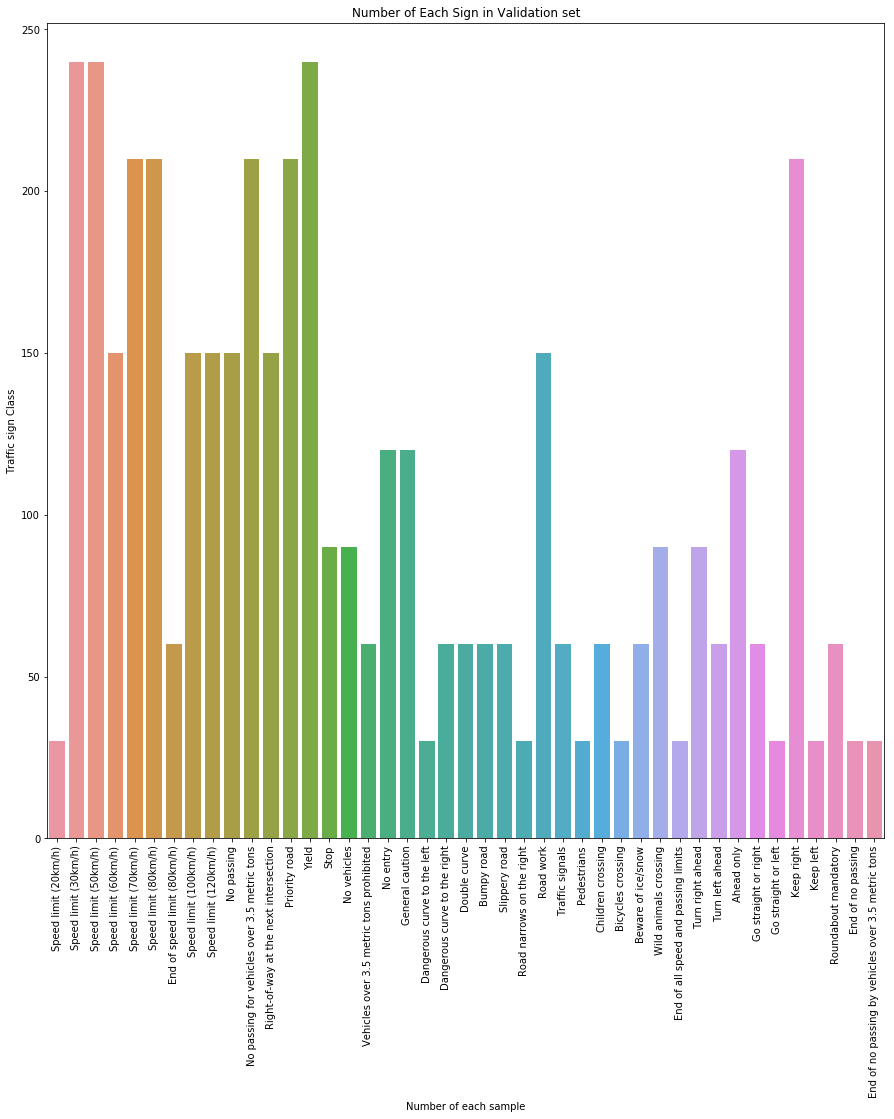

In [6]:
d = np.unique(y_valid,return_counts = True)
class_label_num = d[0]
class_label_count = d[1]
plt.figure(figsize = (15,15))
ax = sns.barplot(class_label_num,class_label_count, orient = 'o');
#ax = plt.plot(class_label_count,class_label_num,kind = 'barh');
plt.xticks(rotation = 90)
plt.xticks(class_label_num,labels);
plt.ylabel("Traffic sign Class")
plt.xlabel("Number of each sample")
plt.title("Number of Each Sign in Validation set")

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Discussion:
Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques?


I used 20% of the training data as the validation set. At first I did not split the data and found that my validation accuracy was low. As soon as i split the data in 20-80 ratio I see a substantial increase in the accuracy. I then shuffle and normalize the data set. This step is performed so that the pixel intensity becomes consistent for all the images. I have used a linear transform as (pixel_value -128)/128 on each pixel. I shuffle the data so that the data can be randomly distributed and the model does not rote the data set.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#shuffle the training data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X_train, y_train,test_size=0.2,random_state=15)
X_train, y_train = shuffle(X_train, y_train)

In [8]:
# Normalize the data
def normalize(data):
    normal_data = (data.astype(float) -128.0)/128
    return normal_data

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test  = normalize(X_test)

### Model Architecture

Discussion:
Describe what your final model architecture looks like including model
type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model is a basic LeNet model with regularization. I found that- I got an increase in the performance as I add the regularizatoin layer to the fully connected layers.So my model consists of the following layers:

LAYER #1 
1. convolution layer1 : 5x5 convolution (input: 32x32x3 and output:28x28x6)
2. ReLU
3. 2x2 max pool (input: 28x28x6, output: 14x14x6)

LAYER #2
4. Convolution layer2: 5x5 convolution (input: 14x14x6, output: 10x10x16)
5. ReLU
6. 2x2 max pool (input: 10x10x16, output: 5x5x16)

LAYER #3
7. Fully connected Layer (input: 5x5x6 = 400, output:120)
8. ReLU

LAYER #4:
9. Fully connected Layer (inputL 120, output:84)
10. ReLU

LAYER #5:
11. Fully Connected Layer (Input: 84, output: 43)
12. ReLU

A regularizer is calculated using the tensorflow function tf.nn.l2_loss.
regularizers = (tf.nn.l2_loss(fc1_w) + tf.nn.l2_loss(fc1_b) + tf.nn.l2_loss(fc2_w) + \
                    tf.nn.l2_loss(fc2_b) + tf.nn.l2_loss(fc3_w) + tf.nn.l2_loss(fc3_b))
    


In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE =30

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
        
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5,3, 6), mean=mu, stddev=sigma))
    
    #conv1_b = tf.Variable(tf.truncated_normal(shape=(None, 6), mean=mu, stddev=sigma))
    #actually the bias is more often initialized to just zeros. the random number in weight is enough to provide asymmetry breaking
    conv1_b = tf.Variable(tf.zeros(6))
    
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    #dropout    
    #fc1 = tf.nn.dropout(fc1, keep_prob)
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    #dropout
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(fc2, fc3_w) + fc3_b
    
    
    regularizers = (tf.nn.l2_loss(fc1_w) + tf.nn.l2_loss(fc1_b) + tf.nn.l2_loss(fc2_w) + \
                    tf.nn.l2_loss(fc2_b) + tf.nn.l2_loss(fc3_w) + tf.nn.l2_loss(fc3_b))
    
    logits = fc3
    return logits,regularizers

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

In [11]:
rate = 0.001  
factor = 5e-4 # Regularization factor

logits,regularizers = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
loss_operation += factor * regularizers
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [13]:
# define model evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name = 'accuracy_op')
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
validation_accuracy_val = []
training_accuracy_val = []
test_accuracy_val = []
### Training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]           
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})           
        training_accuracy = evaluate(X_train, y_train)
        training_accuracy_val.append(training_accuracy)
        
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_val.append(validation_accuracy)
        
        test_accuracy = evaluate(X_test, y_test)
        test_accuracy_val.append(test_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
training Accuracy = 0.915
Validation Accuracy = 0.908

EPOCH 2 ...
training Accuracy = 0.957
Validation Accuracy = 0.945

EPOCH 3 ...
training Accuracy = 0.968
Validation Accuracy = 0.956

EPOCH 4 ...
training Accuracy = 0.983
Validation Accuracy = 0.970

EPOCH 5 ...
training Accuracy = 0.988
Validation Accuracy = 0.973

EPOCH 6 ...
training Accuracy = 0.983
Validation Accuracy = 0.972

EPOCH 7 ...
training Accuracy = 0.988
Validation Accuracy = 0.975

EPOCH 8 ...
training Accuracy = 0.984
Validation Accuracy = 0.974

EPOCH 9 ...
training Accuracy = 0.989
Validation Accuracy = 0.974

EPOCH 10 ...
training Accuracy = 0.991
Validation Accuracy = 0.981

EPOCH 11 ...
training Accuracy = 0.991
Validation Accuracy = 0.981

EPOCH 12 ...
training Accuracy = 0.993
Validation Accuracy = 0.979

EPOCH 13 ...
training Accuracy = 0.987
Validation Accuracy = 0.975

EPOCH 14 ...
training Accuracy = 0.988
Validation Accuracy = 0.976

EPOCH 15 ...
training Accuracy = 0.994
Valid

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.994
Valid Accuracy = 0.980
Test Accuracy = 0.921


Discussion:
Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

 
I used the basic LeNet architecture for training this model. My training process was on trial and error basis. I have tried with different values for EPOCH and BATCH_SIZE. My final values for EPOCH and BATCH_SIZE are 30 and 30 respectively, and I was able to get the validation accuracy of 98.8% with these hyperparameters. 
I used the Adam Optimizer that was mentioned in the class lesson with a learning rate of 0.001. I also tried ny adding a dropout layer to the fully connected layers, but it did not improve my performance. So in the final architecture i decided not to include it.

Once I got the accuracy of 98% or so. I ran the model on the test images.


Answer: My final model results were:
Training set accuracy of : 99+
Validation set accuracy of : 98+
Test set accuracy of : 92+

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

<function matplotlib.pyplot.show(*args, **kw)>

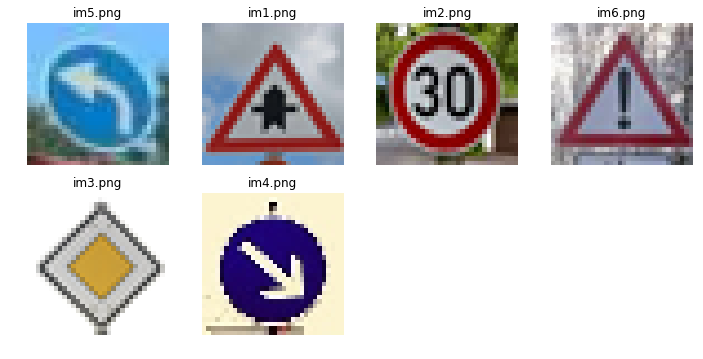

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
import glob
%matplotlib inline

test_img = []
test_img_fname = []

#d = glob.glob("./mytestimages/*.png")
filenames = os.listdir("myimages")
#print(filenames)
for fname in filenames:
    pathname = os.path.join("myimages/",fname)
    if os.path.isdir(pathname):
        continue
    image = mpimg.imread(pathname)
    resized_img = cv2.resize(image,(32,32))
    color_img = cv2.cvtColor(resized_img,cv2.COLOR_BGRA2BGR) 
    test_img.append(color_img)
    test_img_fname.append(fname)


# plot test images
figsize = (12, 12)
plt.figure(figsize=figsize)
for i in range(6):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_img[i])    
    plt.title(test_img_fname[i])
    plt.axis('off')
plt.show

                   

### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) 
    #X = [(im.astype(float)-128.0)/128 for im in X_final_test]
    predicted_logits = sess.run(logits, feed_dict={x: test_img})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    sign_class       = sess.run(tf.argmax(logits, 1), feed_dict={x: test_img})
    for i in range(len(test_img_fname)):
        print("{0} - Prediction of the traffic sign: {1} - The traffic sign class: {2}".format(test_img_fname[i],labels[predicted_labels[i]],sign_class[i]))

INFO:tensorflow:Restoring parameters from ./lenet
im5.png - Prediction of the traffic sign: Turn left ahead - The traffic sign class: 34
im1.png - Prediction of the traffic sign: Right-of-way at the next intersection - The traffic sign class: 11
im2.png - Prediction of the traffic sign: Speed limit (30km/h) - The traffic sign class: 1
im6.png - Prediction of the traffic sign: General caution - The traffic sign class: 18
im3.png - Prediction of the traffic sign: Priority road - The traffic sign class: 12
im4.png - Prediction of the traffic sign: Keep right - The traffic sign class: 38


ANSWER: 
    
I got a very good performance on the test images.Following are the results of the prediction:
    
| Image | Prediction   |
|------|------|
|   im1-right of way | Right-of-way at the next intersection|
|  im2- turn left  | Turn left ahead|
|   im3 - priority road  | priority road|
|   im4- keep right  | keep right|
|   im5- turn left  | turn left|
| im6- Caution  | General caution|

In [15]:
# Accuracy of the model on the New test images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_test_label = [34,11,1,18,12,38]
    test_accuracy = evaluate(test_img, y_test_label)
    print("Test Accuracy = {:.0f}%".format(test_accuracy*100))


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 100%


Discussion
1.I picked up 6 test images to test the performace of my model:
    1. Turn left ahead.
    2. Right-of-way at the intersectoin.
    3. Speed limit (30km/h)
    4. General caution
    5. Priority road
    6. Keep right
   
As you can see the model seems to predict quite well on the test images. The accuracy obtained from the model on the test images is 100% as compared to the test accuracy of 92%+ obtained while training the model. I think that in all the model will not be that robust in all the varying shapes and may be color of the traffic signs from different countries.
Probably the testing on more images would bring down the accuracy a bit. The model must be evaluated for the images that are too similar(example: two images of 30km/hrs of different shape or color), and I think that it will definetely challenge the faithfullness of the model and might bring down the accuracy.
The basic LeNet architecture was a good starting point for the classification of the images, but i think that it would be good to try various other popular models.

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [18]:
with tf.Session() as sess:
    softmax = tf.nn.softmax(predicted_logits)
    my_top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for i in range(len(test_img_fname)):
        print("{0}:".format(test_img_fname[i]))
        for j in range(5):
            print("{:s}: {:.2f}%".format(labels[my_top5[1][i][j]], my_top5[0][i][j]*100))
        print()

im1.png:
Right-of-way at the next intersection: 96.27%
Beware of ice/snow: 3.72%
Roundabout mandatory: 0.00%
Children crossing: 0.00%
Traffic signals: 0.00%

im5.png:
Turn left ahead: 100.00%
Keep right: 0.00%
Beware of ice/snow: 0.00%
Roundabout mandatory: 0.00%
End of no passing: 0.00%

im6.png:
General caution: 100.00%
Traffic signals: 0.00%
Children crossing: 0.00%
Speed limit (80km/h): 0.00%
Pedestrians: 0.00%

im4.png:
Keep right: 100.00%
Roundabout mandatory: 0.00%
Turn left ahead: 0.00%
Yield: 0.00%
Go straight or right: 0.00%

im2.png:
Speed limit (30km/h): 97.79%
Speed limit (50km/h): 1.97%
Speed limit (80km/h): 0.23%
Speed limit (70km/h): 0.01%
Speed limit (20km/h): 0.00%

im3.png:
Priority road: 100.00%
Traffic signals: 0.00%
Go straight or left: 0.00%
Ahead only: 0.00%
End of no passing by vehicles over 3.5 metric tons: 0.00%



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")